In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from scipy.stats import norm

In [2]:
def generate_data(num_data_points):  
    '''
    This function generate and return data samples from
    a normal distribution
    
    Parameters
    -----------
    num_data_points: int
        number of data points needs to be generated
        
    Returns
    ---------
    data: list
        Returns a 1D list of samples
    '''
    
    data =  np.random.randn(num_data_points)
    
    return data

In [3]:
def proposal(current_proposal, proposal_width=0.2):
    '''
    This function generate a new proposal based on the current
    proposal
    
    Parameters
    -----------
    current_proposal: float
        The current value of the parameter for which in the 
        MCMC chain. This will be the mean of the normal 
        distribution from which we are drawing a random sample.
    
    proposal_width: float
        The variance of the normal distribution from whcich 
        we are drawing a random sample. The value of the width
        tells how big the next step could be from the current 
        value which is mean of the distribution.
        
    Returns
    ---------
    next_proposal: float
        The radom number drawn from the normal distribution to 
        be considered as the next value of the parameter.
    '''
    
    next_proposal = np.random.normal(current_proposal, proposal_width)
        
    return next_proposal

### As our prior has an uniform distribution so our posterior is just the likelihood

In [4]:
def likelihood(proposal,data):
    ''''
    This function evaluates the likelihood.
    
    Parameters
    ----------
    proposal: float
        The proposed value(of the parameter) to evaluate it's
        likelihood.
        
    data: list
        The data to help evaluating the likelihood of the
        proposal.


    Returns
    -------
    prob: float
        The probabilty of the proposal to be the actual
        parameter.
    '''
    
    length = len(data)
    normalization = np.sqrt(np.log(proposal)/2/np.pi)**length
    prob = normalization * proposal**(-0.5*sum(data**2))
    
    return prob


In [5]:
def generate_MCMC_chain(sample_number, data, 
                        initial_proposal= 1.5):
    '''
    This function generates and return a MCMC chain
    
    Parameters
    -----------
    sample_number: int
        Number of samples one wants to draw 
        
    data: int
        number of data points one wants to use in evaluating
        likelihood.
    
    initial_proposal: float
        The initial proposed point from where the chain can 
        start.
        
    Returns
    --------
    posterior_chain: list
        A list of samples drawm from MCMC chain
    '''
    
    posterior_chain = []
    data =  data
    current_proposal = initial_proposal
    
    for i in range(sample_number):
        
        next_proposal = proposal(current_proposal) 
            
        current_proposal_likelihood = likelihood(current_proposal,
                                                 data)
        next_proposal_likelihood = likelihood(next_proposal,
                                                 data)
        likelihood_ratio = (next_proposal_likelihood
                           / current_proposal_likelihood)
 
        acceptance_probabilty = min(1.0, likelihood_ratio)

        acceptance = np.random.uniform() <= acceptance_probabilty 
        if acceptance:
            current_proposal = next_proposal
            posterior_chain = np.append(posterior_chain, next_proposal)
        else:
            current_proposal = current_proposal
            posterior_chain = np.append(posterior_chain, current_proposal)
    
    return posterior_chain




### Here we are generating data (given the number of data points) to use both for analytical calculation and MCMC method. 

In [6]:
data = generate_data(100)

### Plotting the analytically calulated posterior density of the parameter 'a'. 

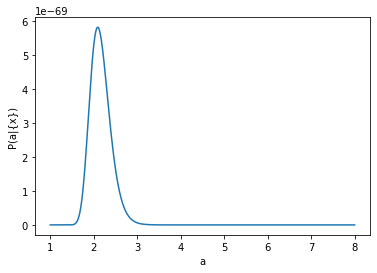

In [7]:
parameter_space = np.linspace(1.0, 8.0, 1000)

posterior = likelihood(parameter_space, data)

plt.plot(parameter_space, posterior)
plt.xlabel('a')
plt.ylabel(r'P(a|{x})')
plt.show()


### Generating MCMC chain and plotting the "trace plot"

/home/pritom/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in sqrt
/home/pritom/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in log
/home/pritom/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


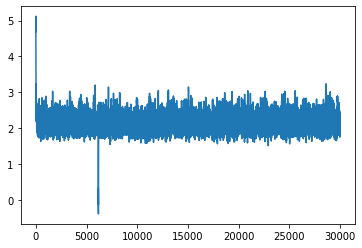

In [8]:
posterior_chain = generate_MCMC_chain(30000, data, 5.0)
plt.plot(posterior_chain)

### Plotting the histogram and comparing with analytical posterior 

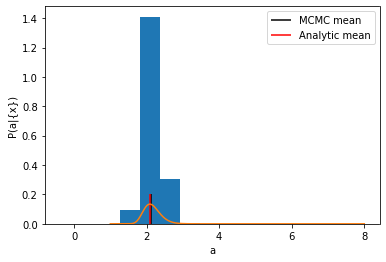

In [9]:
plt.hist(posterior_chain, density=True)
plt.plot(parameter_space,posterior/np.sqrt(np.sum(posterior**2)))
plt.vlines(x=np.median(posterior_chain), ymin=0.0, ymax=1.0,
           color='k',label="MCMC mean")
plt.vlines(x=parameter_space[posterior.argmax()], ymin=0.0, ymax=1.0,
           color='r', label="Analytic mean" )
plt.vlines(x=2.718, ymin=0.0, ymax=1.0, color=)
plt.xlabel('a')
plt.ylabel(r'P(a|{x})')
plt.legend()
plt.show()